In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# Path to dataset directory
data_path = '/kaggle/input/digit-recognizer/'

# Check files inside the dataset directory
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load training data
df = pd.read_csv(os.path.join(data_path, 'train.csv'))

# Quick summary
print(df.info())

# Check for missing values
print(df.isnull().sum())

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


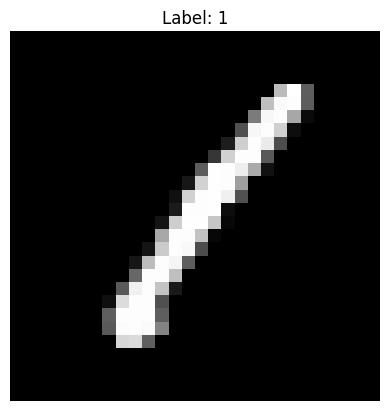

In [2]:
import matplotlib.pyplot as plt

# Take first row (label + pixels)
sample = df.iloc[0, 1:].values.reshape(28, 28)  # reshape to 28x28 image
label = df.iloc[0, 0]

plt.imshow(sample, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


In [3]:
# Features = pixel values, Labels = digit
X = df.drop('label', axis=1).values
y = df['label'].values

print("X shape:", X.shape)  # (42000, 784)
print("y shape:", y.shape)  # (42000,)


X shape: (42000, 784)
y shape: (42000,)


In [4]:
X = X / 255.0


In [5]:
# For CNN
X = X.reshape(-1, 28, 28, 1)
print("Reshaped X:", X.shape)  # (42000, 28, 28, 1)


Reshaped X: (42000, 28, 28, 1)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 33600
Validation samples: 8400


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


2025-09-14 13:18:48.451518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757855928.666434      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757855928.727429      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 digits (0–9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-14 13:19:02.622439: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(28, 28, 1)),  # define input here
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val),
    verbose=2
)


Epoch 1/10
263/263 - 15s - 58ms/step - accuracy: 0.8678 - loss: 0.4257 - val_accuracy: 0.9673 - val_loss: 0.1018
Epoch 2/10
263/263 - 12s - 45ms/step - accuracy: 0.9627 - loss: 0.1262 - val_accuracy: 0.9806 - val_loss: 0.0625
Epoch 3/10
263/263 - 12s - 44ms/step - accuracy: 0.9730 - loss: 0.0895 - val_accuracy: 0.9839 - val_loss: 0.0514
Epoch 4/10
263/263 - 11s - 43ms/step - accuracy: 0.9786 - loss: 0.0713 - val_accuracy: 0.9858 - val_loss: 0.0487
Epoch 5/10
263/263 - 11s - 44ms/step - accuracy: 0.9819 - loss: 0.0607 - val_accuracy: 0.9869 - val_loss: 0.0437
Epoch 6/10
263/263 - 11s - 43ms/step - accuracy: 0.9845 - loss: 0.0501 - val_accuracy: 0.9883 - val_loss: 0.0378
Epoch 7/10
263/263 - 11s - 44ms/step - accuracy: 0.9853 - loss: 0.0473 - val_accuracy: 0.9877 - val_loss: 0.0401
Epoch 8/10
263/263 - 12s - 44ms/step - accuracy: 0.9875 - loss: 0.0403 - val_accuracy: 0.9883 - val_loss: 0.0387
Epoch 9/10
263/263 - 11s - 43ms/step - accuracy: 0.9882 - loss: 0.0381 - val_accuracy: 0.9882 - 

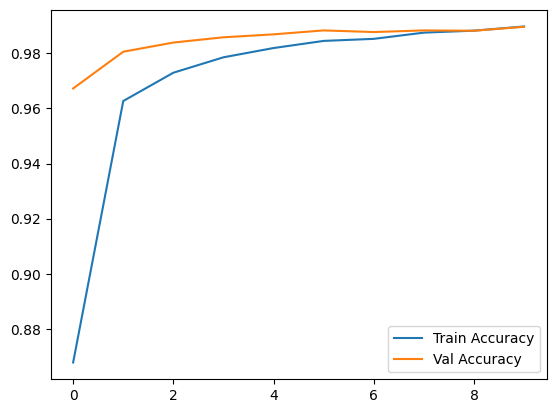

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


In [13]:
import pandas as pd

test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test = test_df.values / 255.0  # normalize like train data
X_test = X_test.reshape(-1, 28, 28, 1)


In [14]:
# Predict on test data
y_pred = model.predict(X_test)   # probability distribution for each digit
y_pred_classes = y_pred.argmax(axis=1)  # get class index (0–9)


875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [15]:
submission = pd.DataFrame({
    'ImageId': range(1, len(y_pred_classes) + 1),
    'Label': y_pred_classes
})

submission.to_csv('submission.csv', index=False)
print("✅ submission.csv created!")


✅ submission.csv created!


In [16]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout

model2 = Sequential([
    Input(shape=(28, 28, 1)),
    
    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    # Block 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    # Fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model2.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,57

 Total params: 585,962 (2.24 MB)

 Trainable params: 585,066 (2.23 MB)

 Non-trainable params: 896 (3.50 KB)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_advanced_cnn.h5', monitor='val_loss', save_best_only=True)
]


In [18]:
history2 = model2.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=2
)


Epoch 1/30
263/263 - 110s - 419ms/step - accuracy: 0.8616 - loss: 0.4488 - val_accuracy: 0.1115 - val_loss: 13.1251
Epoch 2/30
263/263 - 95s - 359ms/step - accuracy: 0.9697 - loss: 0.1017 - val_accuracy: 0.9131 - val_loss: 0.3331
Epoch 3/30
263/263 - 95s - 361ms/step - accuracy: 0.9778 - loss: 0.0751 - val_accuracy: 0.9871 - val_loss: 0.0438
Epoch 4/30
263/263 - 94s - 359ms/step - accuracy: 0.9824 - loss: 0.0590 - val_accuracy: 0.9907 - val_loss: 0.0349
Epoch 5/30
263/263 - 95s - 360ms/step - accuracy: 0.9855 - loss: 0.0498 - val_accuracy: 0.9894 - val_loss: 0.0409
Epoch 6/30
263/263 - 96s - 364ms/step - accuracy: 0.9866 - loss: 0.0463 - val_accuracy: 0.9910 - val_loss: 0.0331
Epoch 7/30
263/263 - 95s - 361ms/step - accuracy: 0.9882 - loss: 0.0379 - val_accuracy: 0.9894 - val_loss: 0.0372
Epoch 8/30
263/263 - 96s - 363ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.9896 - val_loss: 0.0349
Epoch 9/30
263/263 - 96s - 363ms/step - accuracy: 0.9894 - loss: 0.0377 - val_accuracy